In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
# testing different l2 ratio and compare the training result
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
# hyperparameters

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [5]:
# training with different l2 ratio

results = {} # for plotting later
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 400us/step - loss: 15.1156 - acc: 0.2768 - val_loss: 13.9780 - val_acc: 0.3366
Epoch 2/50
50000/50000 [==============================] - 14s 270us/step - loss: 13.0381 - acc: 0.3600 - val_loss: 12.1424 - val_acc: 0.3772
Epoch 3/50
50000/50000 [==============================] - 14s 277us/step - loss: 11.3587 - acc: 0.3861 - val_loss: 10.6072 - val_acc: 0.3941
Epoch 4/50
50000/50000 [==============================] - 12s 244us/step - loss: 9.9435 - acc: 0.3975 - val_loss: 9.3031 - val_acc: 0.4033
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 8.7410 - acc: 0.4092 - val_loss: 8.1953 - val_acc: 0.4158
Epoch 6/50
50000/50000 [==============================] - 13s 259us/step - loss: 7.7166 - ac

50000/50000 [==============================] - 15s 301us/step - loss: 1.8061 - acc: 0.4154 - val_loss: 1.7807 - val_acc: 0.4193
Epoch 5/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.7588 - acc: 0.4332 - val_loss: 1.7416 - val_acc: 0.4424
Epoch 6/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.7199 - acc: 0.4466 - val_loss: 1.7078 - val_acc: 0.4488
Epoch 7/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.6879 - acc: 0.4566 - val_loss: 1.6856 - val_acc: 0.4533
Epoch 8/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.6564 - acc: 0.4701 - val_loss: 1.6653 - val_acc: 0.4630
Epoch 9/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.6299 - acc: 0.4774 - val_loss: 1.6489 - val_acc: 0.4640
Epoch 10/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.6048 - acc: 0.4868 - val_loss: 1.6269 - val_acc: 0.4748
Epoch 11/50
50000/50000 [============

50000/50000 [==============================] - 12s 245us/step - loss: 1.4179 - acc: 0.5016 - val_loss: 1.4751 - val_acc: 0.4741
Epoch 13/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.3952 - acc: 0.5108 - val_loss: 1.4460 - val_acc: 0.4893
Epoch 14/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3747 - acc: 0.5184 - val_loss: 1.4574 - val_acc: 0.4773
Epoch 15/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3573 - acc: 0.5232 - val_loss: 1.4240 - val_acc: 0.4969
Epoch 16/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.3356 - acc: 0.5308 - val_loss: 1.4102 - val_acc: 0.5019
Epoch 17/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.3205 - acc: 0.5375 - val_loss: 1.3974 - val_acc: 0.5015
Epoch 18/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3030 - acc: 0.5418 - val_loss: 1.3951 - val_acc: 0.5005
Epoch 19/50
50000/50000 [=======

50000/50000 [==============================] - 11s 223us/step - loss: 1.2866 - acc: 0.5466 - val_loss: 1.3813 - val_acc: 0.5051
Epoch 21/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.2683 - acc: 0.5559 - val_loss: 1.3919 - val_acc: 0.5064
Epoch 22/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.2575 - acc: 0.5567 - val_loss: 1.3697 - val_acc: 0.5082
Epoch 23/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.2414 - acc: 0.5635 - val_loss: 1.3639 - val_acc: 0.5181
Epoch 24/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.2238 - acc: 0.5697 - val_loss: 1.3752 - val_acc: 0.5154
Epoch 25/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.2085 - acc: 0.5766 - val_loss: 1.3747 - val_acc: 0.5112
Epoch 26/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.1971 - acc: 0.5798 - val_loss: 1.3485 - val_acc: 0.5237
Epoch 27/50
50000/50000 [=======

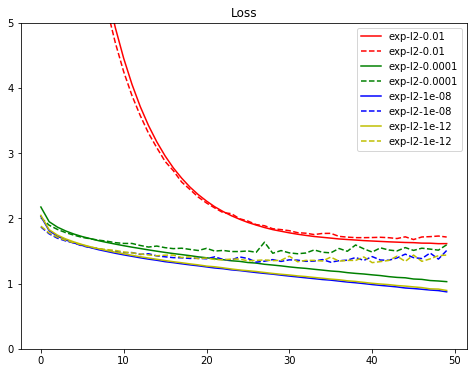

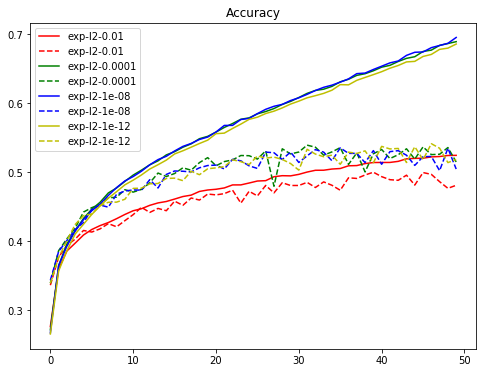

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [8]:
# training with different values of l1

def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

results = {} # for plotting later
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 251us/step - loss: 198.6000 - acc: 0.2320 - val_loss: 41.1341 - val_acc: 0.2600
Epoch 2/50
50000/50000 [==============================] - 13s 258us/step - loss: 19.1294 - acc: 0.1155 - val_loss: 7.2909 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 12s 243us/step - loss: 4.1150 - acc: 0.1000 - val_loss: 2.6502 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.4862 - acc: 0.0994 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 15s 296us/step - loss: 2.4626 - acc: 0.0967 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 13s 259us/step - 

50000/50000 [==============================] - 11s 227us/step - loss: 5.0572 - acc: 0.4673 - val_loss: 5.0352 - val_acc: 0.4569
Epoch 9/50
50000/50000 [==============================] - 11s 224us/step - loss: 4.9701 - acc: 0.4745 - val_loss: 4.9620 - val_acc: 0.4642
Epoch 10/50
50000/50000 [==============================] - 11s 224us/step - loss: 4.8870 - acc: 0.4836 - val_loss: 4.8777 - val_acc: 0.4735
Epoch 11/50
50000/50000 [==============================] - 11s 225us/step - loss: 4.8055 - acc: 0.4906 - val_loss: 4.7954 - val_acc: 0.4793
Epoch 12/50
50000/50000 [==============================] - 11s 228us/step - loss: 4.7246 - acc: 0.4987 - val_loss: 4.7259 - val_acc: 0.4814
Epoch 13/50
50000/50000 [==============================] - 11s 228us/step - loss: 4.6462 - acc: 0.5049 - val_loss: 4.6669 - val_acc: 0.4799
Epoch 14/50
50000/50000 [==============================] - 11s 229us/step - loss: 4.5697 - acc: 0.5098 - val_loss: 4.6040 - val_acc: 0.4853
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 11s 229us/step - loss: 1.3308 - acc: 0.5332 - val_loss: 1.4180 - val_acc: 0.5016
Epoch 17/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.3139 - acc: 0.5404 - val_loss: 1.3898 - val_acc: 0.5080
Epoch 18/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.2981 - acc: 0.5429 - val_loss: 1.4091 - val_acc: 0.5049
Epoch 19/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.2809 - acc: 0.5496 - val_loss: 1.3876 - val_acc: 0.5089
Epoch 20/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.2646 - acc: 0.5552 - val_loss: 1.4083 - val_acc: 0.5005
Epoch 21/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.2492 - acc: 0.5582 - val_loss: 1.3725 - val_acc: 0.5113
Epoch 22/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.2327 - acc: 0.5672 - val_loss: 1.3694 - val_acc: 0.5132
Epoch 23/50
50000/50000 [=======

50000/50000 [==============================] - 11s 225us/step - loss: 1.1885 - acc: 0.5818 - val_loss: 1.4075 - val_acc: 0.5048
Epoch 25/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.1741 - acc: 0.5867 - val_loss: 1.4719 - val_acc: 0.4881
Epoch 26/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1579 - acc: 0.5900 - val_loss: 1.3537 - val_acc: 0.5241
Epoch 27/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.1443 - acc: 0.5969 - val_loss: 1.3547 - val_acc: 0.5208
Epoch 28/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1317 - acc: 0.6011 - val_loss: 1.4339 - val_acc: 0.5026
Epoch 29/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.1183 - acc: 0.6054 - val_loss: 1.3792 - val_acc: 0.5147
Epoch 30/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.1047 - acc: 0.6099 - val_loss: 1.3289 - val_acc: 0.5348
Epoch 31/50
50000/50000 [=======

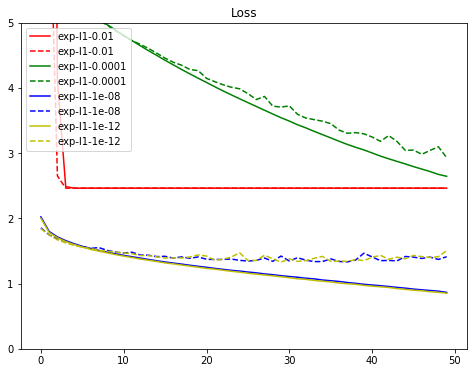

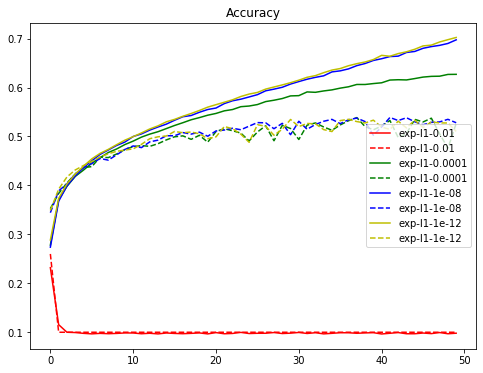

In [10]:
# plotting the result using l1 regularizer
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [26]:
# training with different values of l1 and l2
from keras.regularizers import l1, l2, l1_l2
import numpy as np

L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

def build_mlp_l2_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4,l2_ratio = 1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1 = l1_ratio,l2 = l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer= l1_l2( l1 = l1_ratio, l2 = l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

results = {} # for plotting later
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l2_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio, l2_ratio = regulizer_ratio)
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 43s 867us/step - loss: 197.7795 - acc: 0.2507 - val_loss: 35.9772 - val_acc: 0.2444
Epoch 2/50
50000/50000 [==============================] - 21s 417us/step - loss: 15.9327 - acc: 0.1076 - val_loss: 5.1490 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 25s 506us/step - loss: 3.2182 - acc: 0.0982 - val_loss: 2.4722 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 16s 311us/step - loss: 2.4632 - acc: 0.0976 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.4624 - acc: 0.0982 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 13s 270us/step - loss: 2.4624 - acc: 0.0994 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 13s 264us/step - 

50000/50000 [==============================] - 12s 247us/step - loss: 5.1672 - acc: 0.4619 - val_loss: 5.1425 - val_acc: 0.4550
Epoch 9/50
50000/50000 [==============================] - 12s 250us/step - loss: 5.0736 - acc: 0.4702 - val_loss: 5.0529 - val_acc: 0.4626
Epoch 10/50
50000/50000 [==============================] - 13s 262us/step - loss: 4.9834 - acc: 0.4765 - val_loss: 4.9883 - val_acc: 0.4598
Epoch 11/50
50000/50000 [==============================] - 12s 249us/step - loss: 4.8962 - acc: 0.4851 - val_loss: 4.8855 - val_acc: 0.4708
Epoch 12/50
50000/50000 [==============================] - 13s 251us/step - loss: 4.8124 - acc: 0.4914 - val_loss: 4.8132 - val_acc: 0.4736
Epoch 13/50
50000/50000 [==============================] - 13s 251us/step - loss: 4.7298 - acc: 0.4974 - val_loss: 4.7269 - val_acc: 0.4828
Epoch 14/50
50000/50000 [==============================] - 12s 248us/step - loss: 4.6505 - acc: 0.5029 - val_loss: 4.6527 - val_acc: 0.4893
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 13s 251us/step - loss: 1.3436 - acc: 0.5285 - val_loss: 1.4041 - val_acc: 0.5022
Epoch 17/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.3253 - acc: 0.5331 - val_loss: 1.4346 - val_acc: 0.4931
Epoch 18/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.3087 - acc: 0.5389 - val_loss: 1.4088 - val_acc: 0.5046
Epoch 19/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.2901 - acc: 0.5476 - val_loss: 1.3903 - val_acc: 0.5030
Epoch 20/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.2755 - acc: 0.5497 - val_loss: 1.3967 - val_acc: 0.5018
Epoch 21/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.2600 - acc: 0.5558 - val_loss: 1.3765 - val_acc: 0.5105
Epoch 22/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.2448 - acc: 0.5624 - val_loss: 1.3605 - val_acc: 0.5133
Epoch 23/50
50000/50000 [=======

50000/50000 [==============================] - 12s 247us/step - loss: 1.2038 - acc: 0.5775 - val_loss: 1.3608 - val_acc: 0.5174
Epoch 25/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.1893 - acc: 0.5812 - val_loss: 1.4350 - val_acc: 0.4940
Epoch 26/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.1744 - acc: 0.5878 - val_loss: 1.3571 - val_acc: 0.5210
Epoch 27/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.1650 - acc: 0.5908 - val_loss: 1.4873 - val_acc: 0.4890
Epoch 28/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.1503 - acc: 0.5958 - val_loss: 1.3792 - val_acc: 0.5146
Epoch 29/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.1341 - acc: 0.6045 - val_loss: 1.3376 - val_acc: 0.5281
Epoch 30/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.1226 - acc: 0.6071 - val_loss: 1.3713 - val_acc: 0.5146
Epoch 31/50
50000/50000 [=======

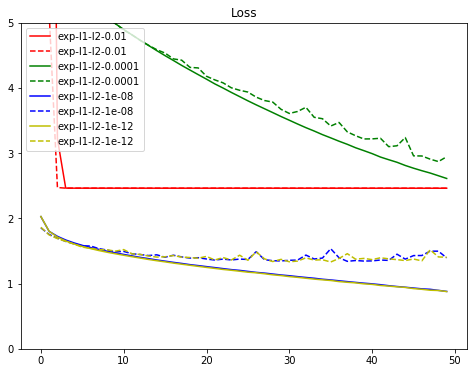

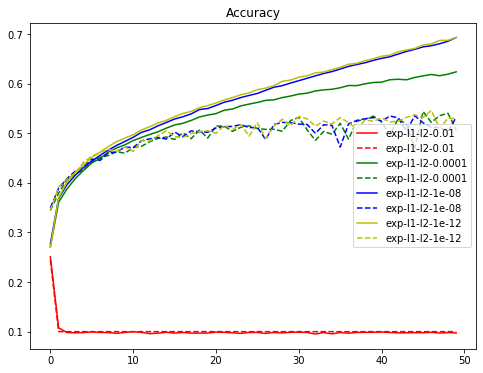

In [27]:
# plotting the result using l1_l2 regularizer
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()